# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1027.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           3.92e-42
Time:                        07:56:07   Log-Likelihood:                 2.8154
No. Observations:                  50   AIC:                             2.369
Df Residuals:                      46   BIC:                             10.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9583      0.081     61.005      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.46310475  4.91186471  5.32679631  5.68514501  5.97236827  6.18452482
  6.32892226  6.42291638  6.49105965  6.56106739  6.65926414  6.80625866
  7.01355795  7.2816767   7.6000527   7.94878222  8.30189008  8.63159737
  8.91288538  9.12760615  9.26746411  9.335379    9.34500621  9.3184932
  9.28284074  9.26546678  9.28970174  9.3709554   9.5141851   9.71308128
  9.95110411 10.20420096 10.44475814 10.64613779 10.78705439 10.85507189
 10.84864696 10.77738253 10.66045003 10.52343965 10.39415586 10.29804928
 10.25403518 10.27138577 10.34820678 10.47174873 10.62050158 10.76772879
 10.88586008 10.95102111]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.93566797 10.80851052 10.58592236 10.30521685 10.01551151  9.76570232
  9.5924923   9.5114053   9.51298525  9.56511133]


## Plot comparison

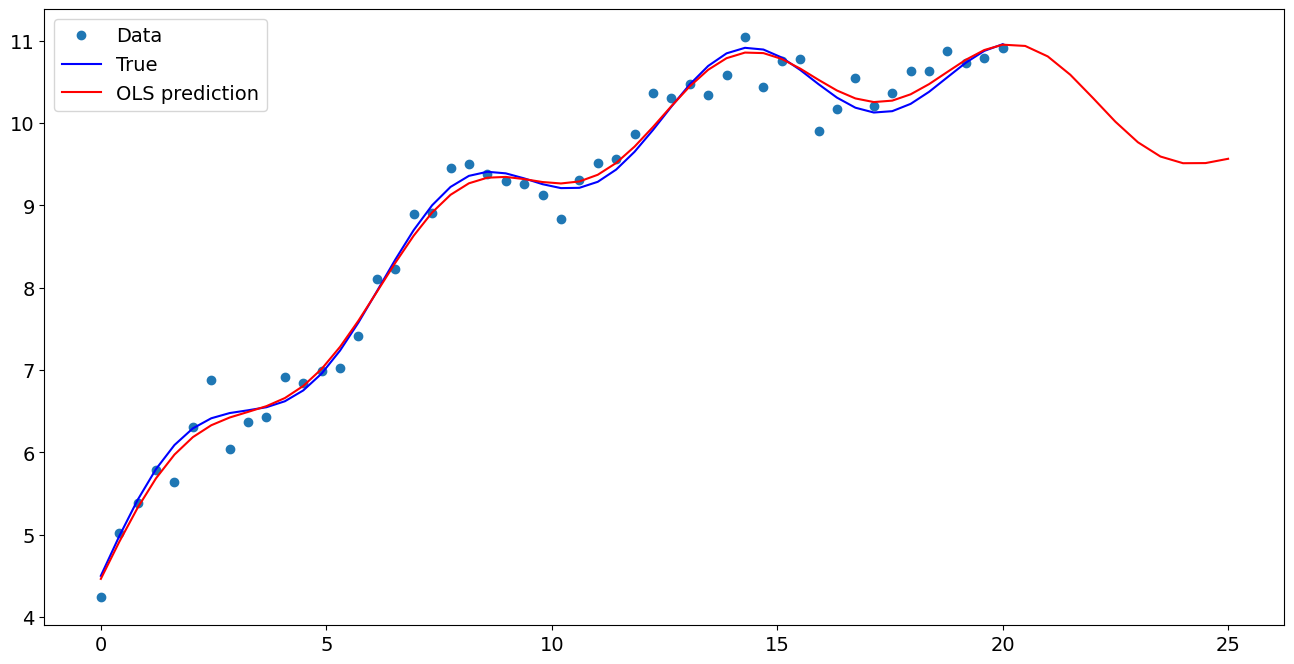

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.958337
x1                  0.503430
np.sin(x1)          0.417521
I((x1 - 5) ** 2)   -0.019809
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.935668
1    10.808511
2    10.585922
3    10.305217
4    10.015512
5     9.765702
6     9.592492
7     9.511405
8     9.512985
9     9.565111
dtype: float64